In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("D:\Thesis\PCM/Earth_movers.csv",index_col=0)
df.reset_index(drop=True, inplace=True)


In [3]:
df.size

100

In [4]:
pca = PCA()
pca.fit(df)

PCA()

In [5]:
pca.explained_variance_ratio_


array([6.54273040e-01, 2.05989111e-01, 5.95371729e-02, 2.11495013e-02,
       1.59174462e-02, 1.37328360e-02, 1.27243369e-02, 8.75735470e-03,
       7.91920067e-03, 1.25442631e-32])

Text(0, 0.5, 'Cumulative explained variance')

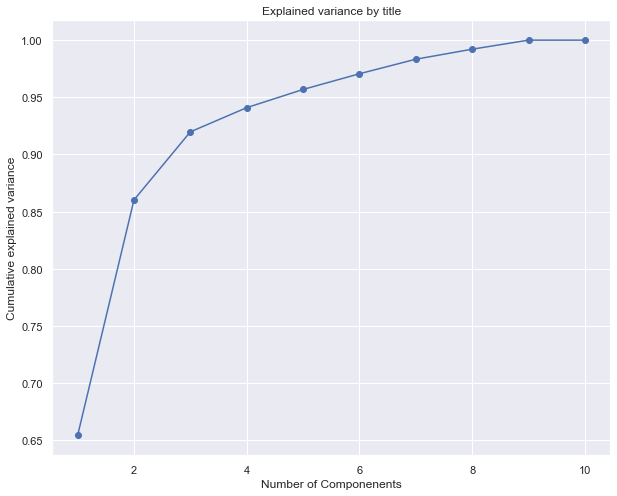

In [6]:
plt.figure(figsize = (10,8) )
plt.plot(range(1,11),pca.explained_variance_ratio_.cumsum(),marker='o')
plt.title('Explained variance by title')
plt.xlabel('Number of Componenents')
plt.ylabel('Cumulative explained variance')

In [7]:
pca = PCA(n_components = 3)
transformed_pca = pca.fit_transform(df)

In [8]:
inertias = []

for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(transformed_pca)
    inertias.append(kmeans_pca.inertia_)

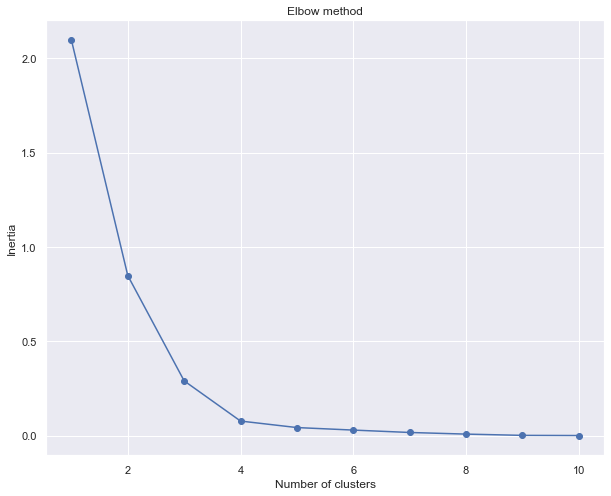

In [9]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), inertias, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca.fit(transformed_pca)
kmeans_pca.labels_

array([1, 1, 1, 1, 2, 0, 0, 1, 2, 2])